<a href="https://colab.research.google.com/github/angiorda/physical-chemistry-kinetics-oral-exam-question/blob/main/Kinetics_oral_exam_question_instructor_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The kinetics of double-stand formation for a DNA oligonucleotide containing a GTbase pair was measure by temperature dependent kinteics experiment. The reaction and data obtained are given below. Do both the forward and reverse reactions follow Arrhenius behavior?  If so, calculate the activation energy for the reaction(s). If not, why can we not calculate an activation energy?  

---


  2CGTAATTCGCG $  \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} $ DUPLEX







In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
!pip install lmfit
import lmfit
sp.init_printing(use_latex=False)

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 215kB 8.8MB/s 
     |████████████████████████████████| 256kB 12.5MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=50a804e32baae1ecef7bc0a8b25a08c9d4428256e63560acf5ff3fd3d9eddbd7
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.19-cp36-none-any.whl size=17486 sha256=8049701301bb37d06de112b49f1fa107fd49112dd442a549da06e95754692937
  Stored in directory: /root/.cache/pip/wheels/59/da/bf/62853db4291f1c5f91326e32e4d1766b8cfcccd1c0e6eaf53f
Successfully built lmfit asteval


In [ ]:
# Enter data sets 

temperature = np.array([304.93, 309.95, 314.95,319.85])      # temperature in Kelvin
k_forward = np.array([0.8e5,2.3e5,3.5e5,6.0e5])   # k_1 rate constant in M^-1 s^-1 (forward reaction)
k_reverse = np.array([5.00, 100, 5000, 4.00])  # k_-1 rate constant in s^-1 (reverse reaction)
inverse_temp = 1/temperature      # 1/temperature in Kelvin
lnk_forward = np.log(k_forward)   # natural log of forward rate constant
lnk_reverse = np.log(k_reverse)   # nautral log of reverse rate constant

inverse_temp, lnk_forward, lnk_reverse # Display variables


(array([0.00327944, 0.00322633, 0.00317511, 0.00312647]),
 array([11.28978191, 12.34583459, 12.76568843, 13.30468493]),
 array([1.60943791, 4.60517019, 8.51719319, 1.38629436]))

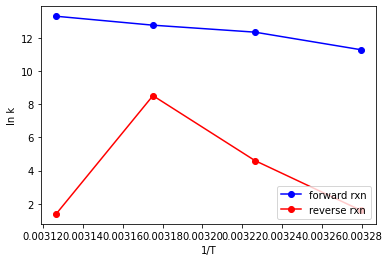

In [ ]:
plt.plot(inverse_temp,lnk_forward,"-o",color='b')   #plot ln k_forward vs 1/T
plt.plot(inverse_temp,lnk_reverse,"-o",color='r')   #plot ln k_reverse vs 1/T

plt.xlabel("1/T")
plt.ylabel("ln k")
plt.legend(["forward rxn","reverse rxn"],loc='lower right')

In [ ]:
# General function definition for a linear fit

def fit_function_linear(params, x, y):
    ycalc = params['slope'] * x + params['yint']     # y = mx+b
    resid = y - ycalc
    return resid

In [ ]:
# Equation Fit

params_k_forward = lmfit.Parameters()
params_k_forward.add('yint',value = 0)
params_k_forward.add('slope',value = 1)

result_k_forward_lin = lmfit.minimize(fit_function_linear, params_k_forward, args=(inverse_temp, lnk_forward))

print(lmfit.fit_report(result_k_forward_lin))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 4
    # variables        = 2
    chi-square         = 0.08215347
    reduced chi-square = 0.04107674
    Akaike info crit   = -11.5418420
    Bayesian info crit = -12.7692533
[[Variables]]
    yint:   53.1202556 +/- 5.68855550 (10.71%) (init = 0)
    slope: -12709.5106 +/- 1776.37277 (13.98%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(yint, slope) = -1.000


In [ ]:
# check fit with plot

m_k_forward = -12709.5016   # enter slope
b_k_forward = 53.1202556  # enter y-intercept
y_k_forwardfit = m_k_forward*inverse_temp+b_k_forward    # y = mx + b  linear equation

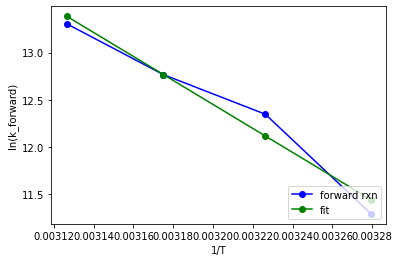

In [ ]:
# plot fit

plt.plot(inverse_temp, lnk_forward, marker='o', color='b')    # original data
plt.plot(inverse_temp, y_k_forwardfit,  marker='o', color='g')                # fit results
plt.xlabel("1/T")
plt.ylabel("ln(k_forward)")
plt.legend(['forward rxn', 'fit'], loc='lower right')

In [ ]:
# Equation Fit

params_k_reverse = lmfit.Parameters()
params_k_reverse.add('yint',value = 0)
params_k_reverse.add('slope',value = 1)

result_k_reverse_lin = lmfit.minimize(fit_function_linear, params_k_reverse, args=(inverse_temp, lnk_reverse))

print(lmfit.fit_report(result_k_reverse_lin))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 4
    # variables        = 2
    chi-square         = 32.6288475
    reduced chi-square = 16.3144237
    Akaike info crit   = 12.3956097
    Bayesian info crit = 11.1681984
[[Variables]]
    yint:   27.2588255 +/- 113.367840 (415.89%) (init = 0)
    slope: -7254.99605 +/- 35401.5258 (487.96%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(yint, slope) = -1.000


In [ ]:
# check fit with plot

m_k_reverse = -7254.99605   # enter slope
b_k_reverse = 27.2588255  # enter y-intercept
y_k_reversefit = m_k_reverse*inverse_temp+b_k_reverse    # y = mx + b  linear equation

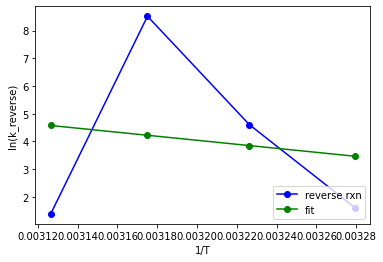

In [ ]:
# plot fit

plt.plot(inverse_temp, lnk_reverse, marker='o', color='b')    # original data
plt.plot(inverse_temp, y_k_reversefit,  marker='o', color='g')                # fit results
plt.xlabel("1/T")
plt.ylabel("ln(k_reverse)")
plt.legend(['reverse rxn', 'fit'], loc='lower right')

In [ ]:
#Calculate activation energy
R = 8.3145
activation_energy = (-R*m_k_forward)/1000
(activation_energy, "kJ/mol")

(105.67315105320002, 'kJ/mol')